In [1]:
import sys
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
from transform import *

/home/david/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
## pull data

b1_path = 'data/MS/FLD/part_b1/'
b2_path = 'data/MS/FLD/part_b2/'
b3_path = 'data/MS/FLD/part_b3/'

b1= get_osiris_quantity_1d(b1_path)
b1_0 = vysxd_get_data(f'{b1_path}part_b1-000000.h5') ##can use this for easy labeling

b2 = get_osiris_quantity_1d(b2_path)
b2_0 = vysxd_get_data(f'{b2_path}part_b2-000000.h5')

b3 = get_osiris_quantity_1d(b3_path)
b3_0 = vysxd_get_data(f'{b3_path}part_b3-000000.h5')


e1_path = 'data/MS/FLD/part_e1/'
e2_path = 'data/MS/FLD/part_e2/'
e3_path = 'data/MS/FLD/part_e3/'

e1 = get_osiris_quantity_1d(e1_path)
e1_0 = vysxd_get_data(f'{e1_path}part_e1-000000.h5') ##can use this for easy labeling

e2 = get_osiris_quantity_1d(e2_path)
e2_0 = vysxd_get_data(f'{e2_path}part_e2-000000.h5')

e3 = get_osiris_quantity_1d(e3_path)
e3_0 = vysxd_get_data(f'{e3_path}part_e3-000000.h5')

e_density = get_osiris_quantity_1d('data/MS/DENSITY/electrons/charge/')
e_density_0 = vysxd_get_data('data/MS/DENSITY/electrons/charge/charge-electrons-000000.h5')

p_density = get_osiris_quantity_1d('data/MS/DENSITY/positrons/charge/')
p_density_0 = vysxd_get_data('data/MS/DENSITY/positrons/charge/charge-positrons-000000.h5')


In [3]:
e_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl1/')
e_ufl1_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl1/ufl1-electrons-000000.h5')

p_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/positrons/ufl1/')
p_ufl1_0 = vysxd_get_data('data/MS/UDIST/positrons/ufl1/ufl1-positrons-000000.h5')

dt, dx, t, x = e_ufl1[1], e_ufl1[2], e_ufl1[3], e_ufl1[4]

In [4]:
# Define useful bounds for your box

xmin = 2; xmax = 60; tmin = 300;tmax =397; v=.056

if not (os.path.isdir('avg_q')):
    os.makedirs('avg_q')

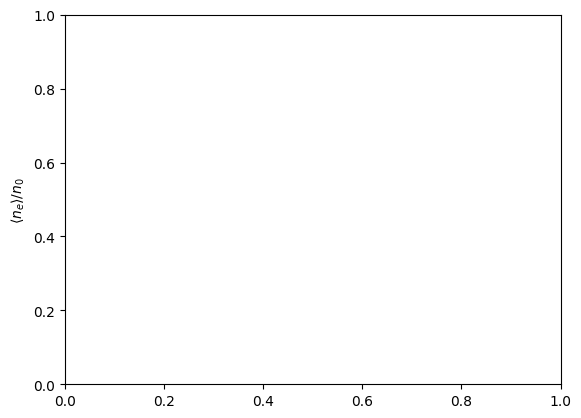

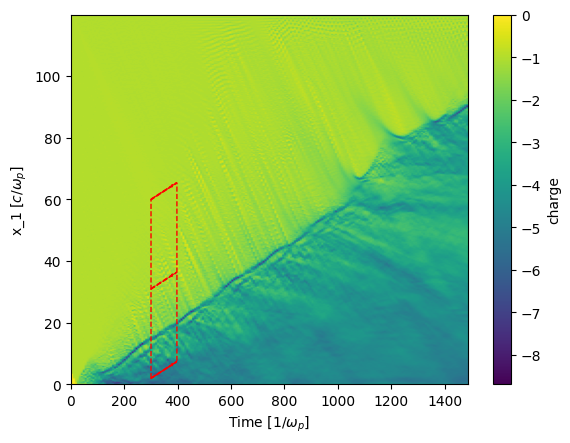

In [5]:
# Integrate quantities and then write them to .npy files to save yourself time in the future
# e_density_integrated = box_integrate(q=e_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e_density_0, plot_flag=True)
# p_density_integrated = box_integrate(q=p_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=p_density_0, plot_flag=True)

plt.ylabel(r'$\langle n_e \rangle /n_0$')

illustrate_box(q=e_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v, q_0 = e_density_0)

In [61]:
np.save("avg_q/"+"p_density",p_density_integrated)
np.save("avg_q/"+"e_density",e_density_integrated)

Now do the same for all the rest of your quantities. It will make your analysis much faster in the future

In [62]:
eprime, bprime = field_transform(v= v,e_=[e1[0],e2[0],e3[0]],b_=[b1[0],b2[0],b3[0]])

b1_integrated = box_integrate(q=[bprime[0],b1[1],b1[2],b1[3],b1[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
b2_integrated = box_integrate(q=[bprime[1],b2[1],b2[2],b2[3],b2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
b3_integrated = box_integrate(q=[bprime[2],b3[1],b3[2],b3[3],b3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)

e1_integrated = box_integrate(q=[eprime[0],e1[1],e1[2],e1[3],e1[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
e2_integrated = box_integrate(q=[eprime[1],e2[1],e2[2],e2[3],e2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
e3_integrated = box_integrate(q=[eprime[2],e3[1],e3[2],e3[3],e3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)

e_ufl1_integrated = box_integrate(q=e_ufl1,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)

/home/david/schaeffer/pair_angle60_B.08_ufl.2/../vysxd/transform.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


In [63]:
p_ufl1_integrated = box_integrate(q=p_ufl1,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
np.save("avg_q/"+"p_ufl1",p_ufl1_integrated)

In [64]:
np.save("avg_q/"+"b1",b1_integrated)
np.save("avg_q/"+"b2",b2_integrated)
np.save("avg_q/"+"b3",b3_integrated)


np.save("avg_q/"+"e1",e1_integrated)
np.save("avg_q/"+"e2",e2_integrated)
np.save("avg_q/"+"e3",e3_integrated)

np.save("avg_q/"+"e_ufl1",e_ufl1_integrated)

In [65]:
# Do the same for flow velocity in y and z, though these quantities should be negligable

e_ufl2 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl2/')
e_ufl2_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl2/ufl2-electrons-000000.h5')
e_ufl2_integrated = box_integrate(q=e_ufl2,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
np.save("avg_q/"+"e_ufl2",e_ufl2_integrated)

e_ufl3 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl3/')
e_ufl3_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl3/ufl3-electrons-000000.h5')
e_ufl3_integrated = box_integrate(q=e_ufl3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
np.save("avg_q/"+"e_ufl3",e_ufl3_integrated)

In [66]:
test = np.load("avg_q/e_density.npy")

In [67]:
p1x1_e = get_osiris_quantity_2d("data/MS/PHA/p1x1/electrons/")
p1x1_p = get_osiris_quantity_2d("data/MS/PHA/p1x1/positrons/")


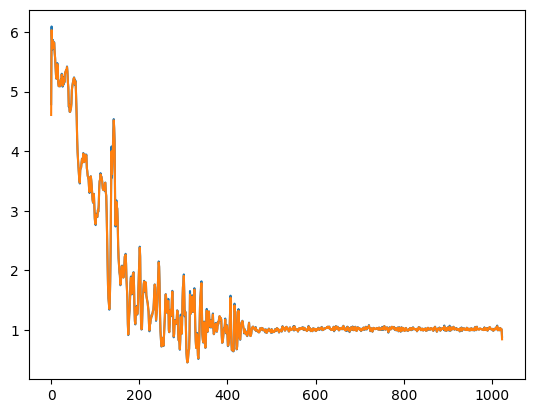

In [68]:
zeroth_moment = np.trapz(p1x1_p[0],axis=1)

plt.plot(zeroth_moment[300,:]/25)
plt.plot(p_density[0][300,:])

In [69]:
temperature_e = get_temperature(p1x1_e,e_ufl1)/-25
temperature_p = get_temperature(p1x1_p,p_ufl1)/25

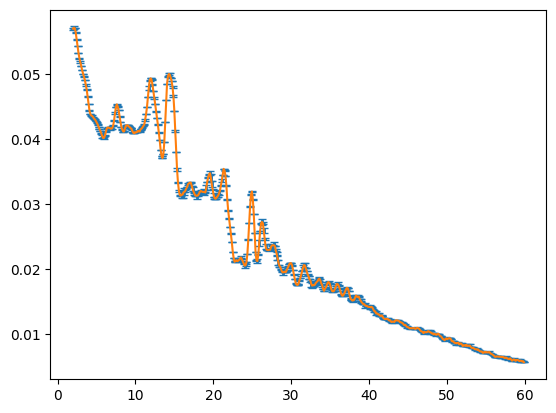

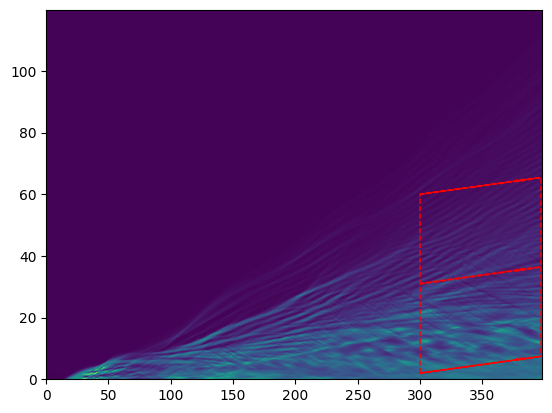

In [70]:

temp_ = box_integrate([temperature_e, dt, dx, t, x],xmin=xmin, xmax=xmax, tmin= tmin, tmax =tmax, v=v)
illustrate_box([temperature_e, dt, dx, t, x],xmin=xmin, xmax=xmax, tmin= tmin, tmax =tmax, v=v)

np.save("avg_q/"+"e_temp",temp_)